In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
thy = pd.read_csv('Fin_Uci_thyroid1.csv')

In [3]:
thy.head()

,age,TSH,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,...,T3 measured_t,TT4_measured_t,T4U_measured_t,FTI_measured_t,STMW,SVHC,SVHD,SVI,other,thyroid_class
0,23,4.10,2.0,102.0,0.97,108.0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
1,46,0.98,2.0,109.0,0.91,120.0,1,0,0,0,...,0,1,1,1,0,0,0,0,1,0
2,70,0.16,1.9,175.0,0.97,108.0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,70,0.72,1.2,61.0,0.87,70.0,0,0,0,0,...,1,1,1,1,0,0,0,1,0,0
4,18,0.03,2.0,183.0,1.30,141.0,0,1,0,0,...,0,1,1,1,0,0,0,0,1,0


In [4]:
thy['thyroid_class'].value_counts()

0    6581
1     220
2     127
Name: thyroid_class, dtype: int64

In [5]:
# negative        6581
# hypothyroid      220
# hyperthyroid     127

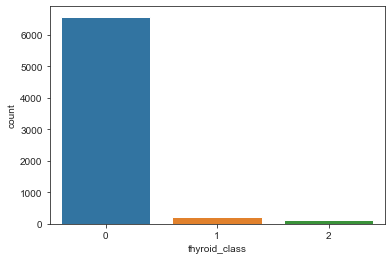

In [34]:
sns.countplot(thy['thyroid_class'])

In [7]:
X = thy.iloc[:, 0:31].values 
y = thy.iloc[:, 31].values 

In [8]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X = sc.fit_transform(X) 

In [9]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2) 
X_comps = pca.fit_transform(X) 

In [10]:
X_comps

array([[ 2.75404412, -0.49992554],
       [ 0.32429882, -0.11721502],
       [ 2.69619567,  0.60074379],
       ...,
       [-0.10796736,  0.81267219],
       [-1.64872341, -1.76477977],
       [-0.26664786,  0.17722112]])

In [11]:
X_comps.shape

(6928, 2)

In [12]:
y.shape

(6928,)

In [19]:
pca = pd.DataFrame(X_comps,columns=['x','y'])

In [20]:
pca

,x,y
0,2.754044,-0.499926
1,0.324299,-0.117215
2,2.696196,0.600744
3,-1.522604,-2.412076
4,0.939181,3.022702
...,...,...
6923,6.732835,-0.689306
6924,-1.365260,-0.189008
6925,-0.107967,0.812672
6926,-1.648723,-1.764780


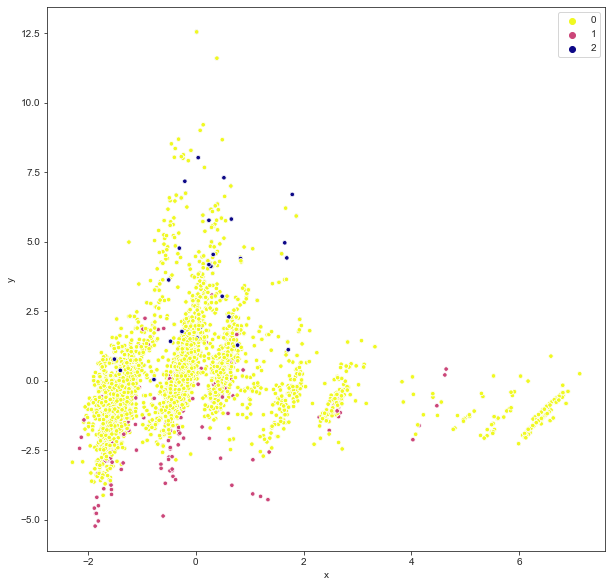

In [36]:
sns.set_style('ticks')
plt.figure(figsize=(10,10))
sns.scatterplot(pca['x'],pca['y'],hue=y,s=20,palette='plasma_r')

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
stri = model.feature_importances_
print(stri)

[5.46796950e-02 4.41038023e-01 7.60515621e-02 1.03147760e-01
 5.63740308e-02 1.29275125e-01 1.08132477e-02 1.22228839e-02
 4.43561146e-03 3.46099306e-03 7.15024194e-03 6.34924183e-03
 1.18101765e-03 2.75946971e-03 8.30353090e-03 1.09805561e-02
 7.08483179e-04 4.51565762e-04 1.28045431e-02 1.59359085e-05
 2.38867107e-03 6.85946202e-03 9.39678949e-03 1.83244121e-03
 3.56335106e-03 3.17514300e-03 7.17173405e-03 3.08437181e-03
 3.85071422e-03 7.12267937e-03 9.35112456e-03]


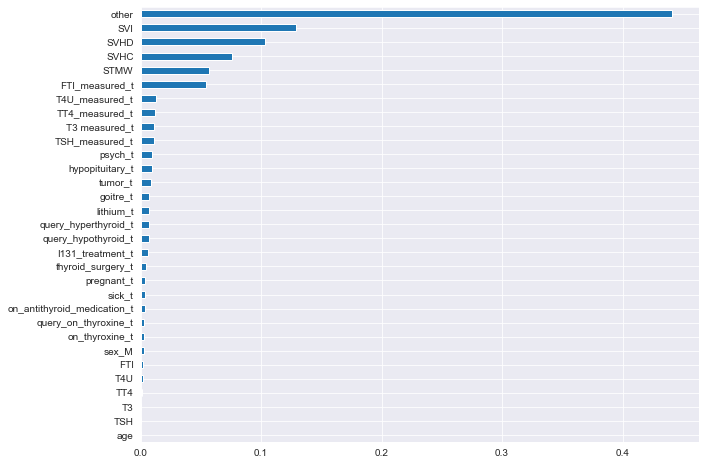

In [27]:
stri.sort()
feat_importances = pd.Series(stri, index=thy.columns[:31])
plt.figure(figsize=(10,8))
feat_importances.plot(kind='barh')